In [1]:
pip install biopython transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.4 MB/s eta 0:00:00


In [2]:
pip install --upgrade transformers torch scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 733.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
pip install transformers torch scipy biopython

In [4]:
import re
from Bio import Entrez
import networkx as nx
import matplotlib.pyplot as plt
import math

def fetch_abstracts(email, query, max_results):
    # ... Your existing code ...
    Entrez.email = email
    handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    record = Entrez.read(handle)
    id_list = record["IdList"]

    abstracts = []
    for pubmed_id in id_list:
        fetch_handle = Entrez.efetch(db="pubmed", id=pubmed_id, rettype="abstract", retmode="text")
        abstracts.append(fetch_handle.read())
    return abstracts

email = "schinnu.sai98@gmail.com"
query = "Amyotrophic Lateral Sclerosis OR C9orf72 OR SOD1 OR Riluzole OR Edaravone"
max_results = 100

    # Fetch abstracts
abstracts = fetch_abstracts(email, query, max_results)

In [5]:
def extract_entities(text):
    entitiess = []

    # Corrected patterns
    drug_pattern = r'\b(Riluzole|Rilutek|Edaravone|Radicava|Sodium phenylbutyrate|taurursodiol|Relyvrio|Tofersen|Qalsody|Exservan|Nuedexta)\b'
    disease_pattern = r'\b(Amyotrophic Lateral Sclerosis|ALS)\b'
    gene_pattern = r'\b(C9orf72|orf|SOD1|SOD 1)\b'

    # ... Rest of your code ...
    drugs = re.findall(drug_pattern, text)
    diseases = re.findall(disease_pattern, text)
    genes = re.findall(gene_pattern, text)

    # Add found entities to the list
    for drug in drugs:
        entitiess.append({'entity': drug, 'type': 'Drug'})

    for disease in diseases:
        entitiess.append({'entity': disease, 'type': 'Disease'})

    for gene in genes:
        entitiess.append({'entity': gene, 'type': 'Gene'})

    return entitiess

all_extracted_entities = []  # List to store all extracted entities

for text in abstracts:
    extracted_entities = extract_entities(text)
    all_extracted_entities.extend(extracted_entities)  # Aggregate results

print(all_extracted_entities)

[{'entity': 'ALS', 'type': 'Disease'}, {'entity': 'Amyotrophic Lateral Sclerosis', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'SOD1', 'type': 'Gene'}, {'entity': 'SOD1', 'type': 'Gene'}, {'entity': 'Amyotrophic Lateral Sclerosis', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {'entity': 'ALS', 'type': 'Disease'}, {

In [6]:
def extract_relations(text, entities):
    """
    Extract relationships between entities in the text.
    This function uses a simple rule-based approach for demonstration.
    """
    relations = []

    # Assuming entities is a list of dictionaries like [{'entity': 'Gene', 'type': 'Gene'}, ...]
    # Sort entities by their occurrence in the text
    entities = sorted(entities, key=lambda x: text.find(x['entity']))

    # Example rule: If a drug and a disease are mentioned close together, infer a 'treatment' relationship
    for i, entity1 in enumerate(entities):
        for j, entity2 in enumerate(entities):
            if i != j:
                # Check proximity or some pattern in text
                if abs(text.find(entity1['entity']) - text.find(entity2['entity'])) < 100:  # Example condition
                    if entity1['type'] == 'Drug' and entity2['type'] == 'Disease':
                        relations.append({'drug': entity1['entity'], 'disease': entity2['entity'], 'relation': 'treatment'})
                    elif entity1['type'] == 'Gene' and entity2['type'] == 'Disease':
                        relations.append({'gene': entity1['entity'], 'disease': entity2['entity'], 'relation': 'association'})

    return relations

for text in abstracts:
    relations = extract_relations(text, all_extracted_entities)
print(relations)

[{'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'Amyotrophic Lateral Sclerosis', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'Amyotrophic Lateral Sclerosis', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'gene': 'SOD1', 'disease': 'ALS', 'relation': 'association'}, {'

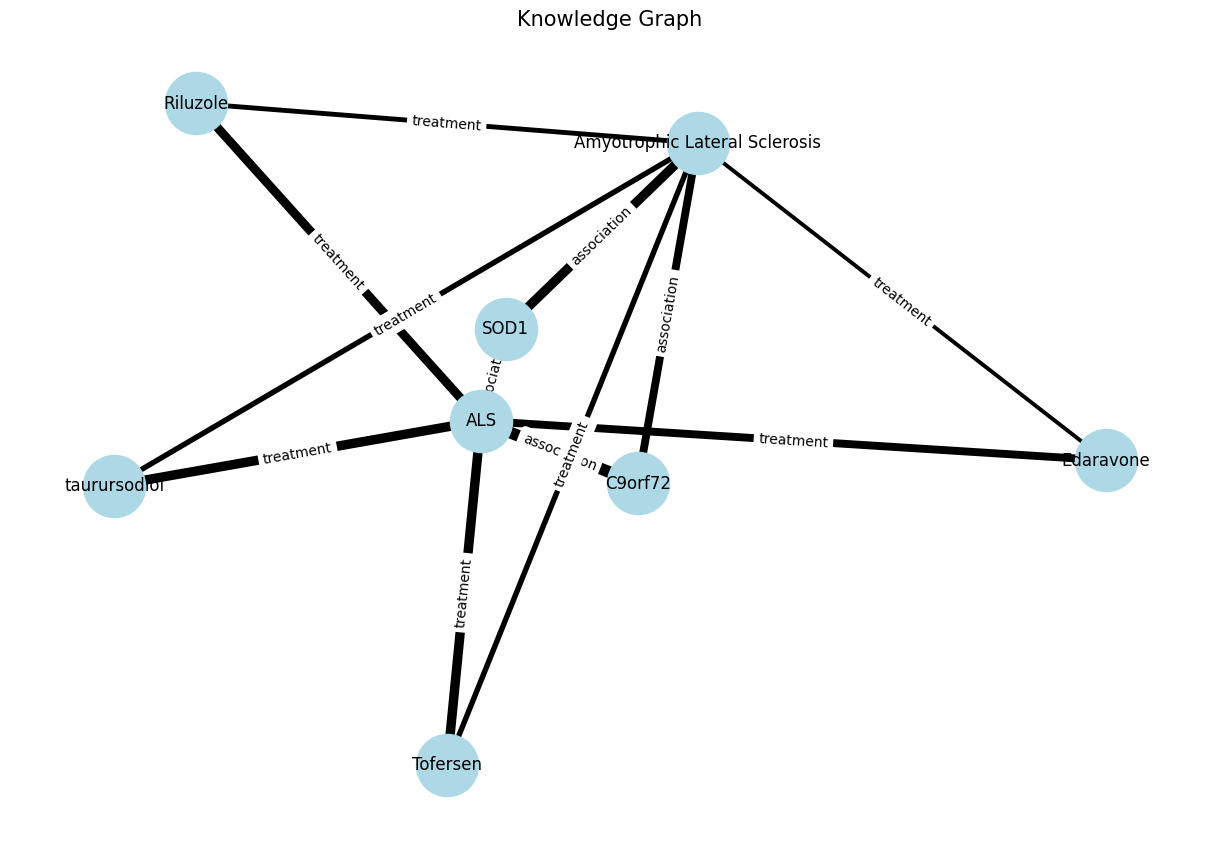

In [7]:
def build_knowledge_graph(relations):
    """
    Build a weighted knowledge graph from the given relations.
    :param relations: List of dictionaries with 'gene' or 'drug', 'disease', and 'relation'
    :return: A NetworkX Graph object representing the knowledge graph.
    """
    G = nx.Graph()

    for relation in relations:
        entity1 = relation.get('gene') or relation.get('drug')
        entity2 = relation.get('disease')
        relation_type = relation.get('relation')

        if entity1 and entity2:
            if G.has_edge(entity1, entity2):
                # Increment weight if edge already exists
                G[entity1][entity2]['weight'] += 1
            else:
                # Add new edge with weight 1
                G.add_edge(entity1, entity2, label=relation_type, weight=1)

    return G


def draw_knowledge_graph(G):
    plt.figure(figsize=(12, 8), facecolor='white')  # Set figure size and background color explicitly
    plt.style.use('default')  # Reset to default style in case it's been altered

    pos = nx.spring_layout(G)  # Positioning of the graph nodes
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    #edge_weights = [G[u][v]['weight'] for u, v in G.edges()]  # Use actual edge weight
    #edge_weights = [G[u][v]['weight'] / 100 for u, v in G.edges()]
    edge_weights = [math.log(G[u][v]['weight'] + 1) for u, v in G.edges()]

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=2000, width=edge_weights, font_size=12,
            node_color='lightblue', edge_color='black', font_color='black')

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Knowledge Graph", size=15)
    plt.grid(False)  # Disable grid
    plt.show()


kg = build_knowledge_graph(relations)
draw_knowledge_graph(kg)